<a href="https://colab.research.google.com/github/crazyboyonline/algorithm-pattern/blob/master/%E6%8B%93%E6%89%91%E6%8E%92%E5%BA%8F%E8%AF%A6%E8%A7%A3%E5%8F%8A%E5%BA%94%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

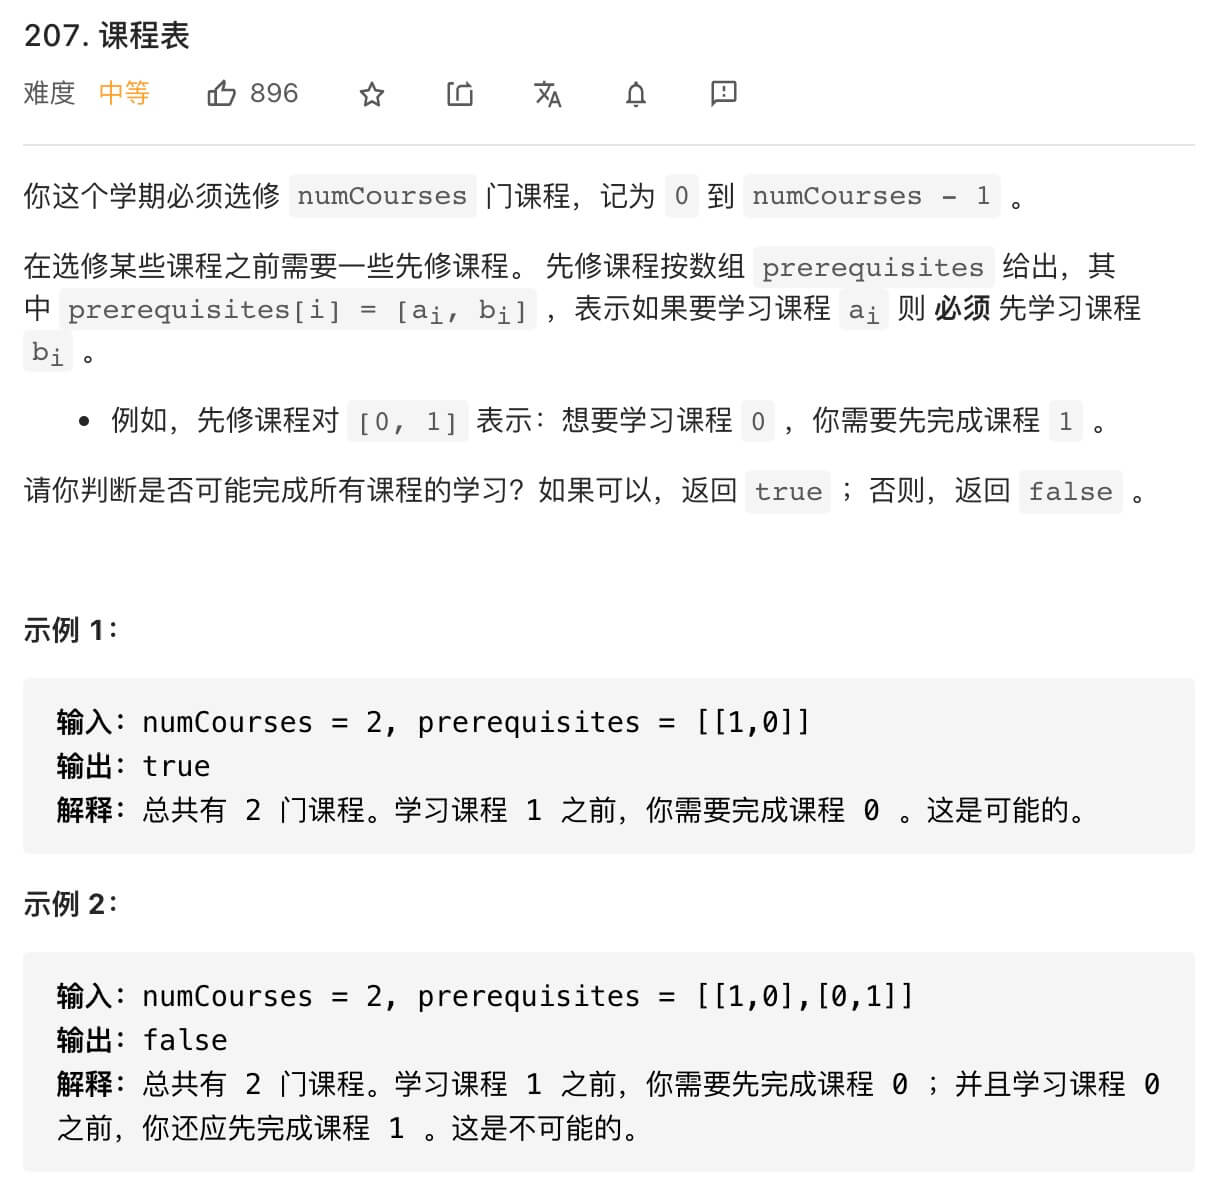

In [ ]:
#建图函数
List<Integer>[] buildGraph(int numCourses, int[][ preprequisites){
    #图中共有numCouses个节点
    List<Integer>[] graph = new LinkedList[numCourse];
    for(int i = 0; i< numCourses; i ++){
        graph[i] = new LinkedList<>();
    }
    for(int[] edge : prerequisites){
        int from = edge[1], to = edge[0];
        #添加一条从from 指向 to的有向边
        #边的角度是被依赖的关系，修完课程from 才能修课程to
        graph[from].add(to);
    }
    return graph;
}

In [1]:
#判断图中是否有环
#防止重复遍历同一个节点
boolean[] visited;
#从节点s开始dfs遍历，将遍历过的节点标记为true
void traverse(List<Integer>[] graph, int s){
    if(visited[s]){
        return;
    }
    #前序遍历
    #将当前节点标记为已遍历
    visited[s] = true;
    for(int t : graph[s]){
        traverse(graph,t);
    }
    #后序遍历代码位置
}

SyntaxError: ignored

In [ ]:
#直接套用之歌遍历代码
#防止重复遍历同一个节点
boolean[] visited;

boolean canFinish(int numCouses, int[][] prerequisites){
    List<Integer>[] graph = buildGraph(numCourses, prerequisites);
    visited = new boolean[numCourses];
    for(int i = 0;i < numCourses; i ++){
        traverse(graph,i);
    }

void traverse(List<Integer>[] graph, int s){
    
}
}


注意图中并不是所有节点都相连，所以要用一个 for 循环将所有节点都作为起点调用一次 DFS 搜索算法。

这样，就能遍历这幅图中的所有节点了，你打印一下 visited 数组，应该全是 true。

前文 学习数据结构和算法的框架思维 说过，图的遍历和遍历多叉树差不多，所以到这里你应该都能很容易理解。

现在可以思考如何判断这幅图中是否存在环。

我们前文 回溯算法核心套路详解 说过，你可以把递归函数看成一个在递归树上游走的指针，这里也是类似的：

你也可以把 traverse 看做在图中节点上游走的指针，只需要再添加一个布尔数组 onPath 记录当前 traverse 经过的路径：

注意图中并不是所有节点都相连，所以要用一个 for 循环将所有节点都作为起点调用一次 DFS 搜索算法。

这样，就能遍历这幅图中的所有节点了，你打印一下 visited 数组，应该全是 true。

前文 学习数据结构和算法的框架思维 说过，图的遍历和遍历多叉树差不多，所以到这里你应该都能很容易理解。

现在可以思考如何判断这幅图中是否存在环。

我们前文 回溯算法核心套路详解 说过，你可以把递归函数看成一个在递归树上游走的指针，这里也是类似的：

你也可以把 traverse 看做在图中节点上游走的指针，只需要再添加一个布尔数组 onPath 记录当前 traverse 经过的路径：

In [ ]:
boolean[] onPath;
boolean[] visited;

boolean hasCycle = false;

void traverse(List<Integer>[] graph, int s){
    
    if(onPath[s]){
        #发现环！！
        hasCycle = true;
    }
    if(visited[s] || hasCycle){
        return;
    }
    #节点s标记为已遍历
    visited[s] =true;
    #开始遍历节点s
    onPath[s] = true;
    for(int t :  graph[s]){
        traverse(graph, t);
    }
    #节点s遍历完成
    onPath[s] = false;
}

这里就有点回溯算法的味道了，在进入节点 s 的时候将 onPath[s] 标记为 true，离开时标记回 false，如果发现 onPath[s] 已经被标记，说明出现了环。

注意 visited 数组和 onPath 数组的区别，因为二叉树算是特殊的图，所以用遍历二叉树的过程来理解下这两个数组的区别：

PS：类比贪吃蛇游戏，visited 记录蛇经过过的格子，而 onPath 仅仅记录蛇身。onPath 用于判断是否成环，类比当贪吃蛇自己咬到自己（成环）的场景。

In [ ]:
// 记录一次递归堆栈中的节点
boolean[] onPath;
// 记录遍历过的节点，防止走回头路
boolean[] visited;
// 记录图中是否有环
boolean hasCycle = false;

boolean canFinish(int numCourses, int[][] prerequisites) {
    List<Integer>[] graph = buildGraph(numCourses, prerequisites);
    
    visited = new boolean[numCourses];
    onPath = new boolean[numCourses];
    
    for (int i = 0; i < numCourses; i++) {
        // 遍历图中的所有节点
        traverse(graph, i);
    }
    // 只要没有循环依赖可以完成所有课程
    return !hasCycle;
}

void traverse(List<Integer>[] graph, int s) {
    if (onPath[s]) {
        // 出现环
        hasCycle = true;
    }
    
    if (visited[s] || hasCycle) {
        // 如果已经找到了环，也不用再遍历了
        return;
    }
    // 前序代码位置
    visited[s] = true;
    onPath[s] = true;
    for (int t : graph[s]) {
        traverse(graph, t);
    }
    // 后序代码位置
    onPath[s] = false;
}

List<Integer>[] buildGraph(int numCourses, int[][] prerequisites) {
    // 代码见前文
}
